## <font color=blue >EF-SEED demo.
This notebook demos how to train the EF-SEED model on the CSV dataset files of ***SFC*** stream sensor. If you want to run it on other sensors, just change the parameter of ***--stream_sensor*** and ***--rain_sensor***.

In our dataset, the parameters should be set to:

--stream_sensor **Ross_S_fixed**
--rain_sensor **Ross_R_fixed** 

--stream_sensor **Saratoga_S_fixed** 
--rain_sensor **Saratoga_R_fixed** 

--stream_sensor **UpperPen_S_fixed** 
--rain_sensor **UpperPen_R_fixed** 

--stream_sensor **SFC_S_fixed** 
--rain_sensor **SFC_R_fixed** 

With EF-SEED, you can build **multi-variate** model, which means you have stream sensor data and nearby rain sensor data.


## <font color=blue >Parameter setting. 

--**stream_sensor**: stream dataset file name. The file should be csv file.

--**rain_sensor**: rain dataset file name. The file should be csv file.

--**train_volume**: train set size.

--**hidden_dim**: hidden dim of lstm layers.

--**atten_dim**: hidden dim of attention layers.

--**layer**: number of layers.
    
--**os_s**: oversampling steps.

--**os_v**: oversampling frequency.

--**oversampling**: ratio of training data with extreme points.
    
--**watershed**: 1 if trained with rain info, else 0.

--**model**: model name, used to generate the pt file and predicted file names.

--**mode**: set it to 'train' or 'inference' with an existing pt_file.

--**pt_file**: if set, the model will be loaded from this pt file, otherwise check the file according to the assigned parameters.

--**save**: if save the predicted file of testset, set to 1, else 0.

--**outf**: default value is './output', the model will be saved in the train folder in this directory.

## <font color=blue >Train a *multi-variate* model with rain data.

In [ ]:
! python run.py \
--stream_sensor SFC_S_fixed \
--rain_sensor SFC_R_fixed \
--model SFC_withRain \
--mode train \
--oversampling 20 \
--os_s 16 \
--os_v 4 \
--cnn_dim 128 \
--watershed 1 \
--r_shift 60 \
--train_volume 19000 \
--hidden_dim 512 \
--gpu_id 0 \
--layer 1 \
--quantile 85 \
--epochs 5 \

## <font color=blue >Load a trained model.

In [7]:
import numpy as np
import random
import imp
from utils.utils2 import *
from run import Options
from models.EFSEED import *
pt = './output/SFC_withRain/train/SFC_withRain.zip'
# get model
model = Options().get_model(pt)

current dir:  /data/hydro/hydro-2/code/EF-SEED
Importing parameters from:  opt.txt ............
norm is:  [1.38939955e+00 1.42360186e+00 7.20744940e-04 7.35950598e-03]


## <font color=blue >Use test_single to do inferencing on one time-point.

test_point is:  2021-12-16 01:45:00
RMSE:  54.468731098601765
MAPE:  0.49577051916824405


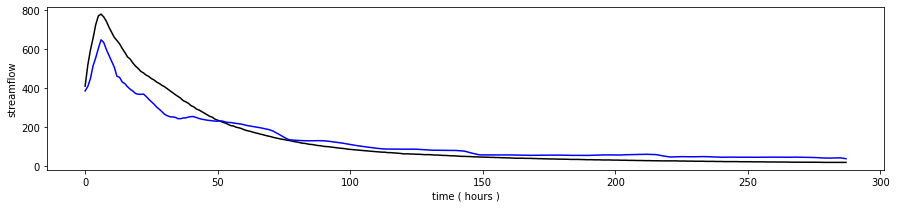

In [9]:
import numpy as np
from utils.utils2 import *
testP=["2021-12-16 01:45:00" ] 
predicted, ground_truth = model.test_single(testP[0])
print("RMSE: ", RMSE(predicted, ground_truth))
print("MAPE: ", MAPE(predicted, ground_truth))
plot(ground_truth, predicted)

## <font color=blue >Inferencing for real-world application.
If you already have test time point, history stream input and rain data input prepared, use ***predict*** function to do it.

In [4]:
import numpy as np
import random
from utils.utils2 import *
from run import Options
from models.EFSEED import *
from models.Inference import *
opt = Options().parse()
# model name
pt = './output/SFC_withRain/train/SFC_withRain.zip'
# get model
model = Options().get_model(pt)
# get data
testP=["2021-12-16 00:30:00"]   
for i in range(len(testP)):
    stream_data, indicator_data, _ = model.get_data(testP[i])  
    p = model.predict(testP[i], stream_data, indicator_data)
    print("Predicted data: ")
    print(p)

current dir:  /data/hydro/hydro-2/code/EF-SEED
Importing parameters from:  opt.txt ............
norm is:  [1.38939955e+00 1.42360186e+00 7.20744940e-04 7.35950598e-03]
test_point is:  2021-12-16 00:30:00
Predicted data: 
[101.79779534 100.6858777  102.42111973 109.08237687 128.74413514
 139.47903627 165.73802822 174.91243354 199.42452373 208.45292049
 220.47304428 229.31652687 228.59690342 233.35242455 237.07321053
 244.01224716 250.10423504 256.68498784 275.53624646 280.12508314
 292.59755437 305.75745666 323.15524354 341.92456035 338.35947777
 328.54534203 322.2050539  314.68469381 303.46031451 296.10754521
 287.50875692 286.76012427 292.08420382 300.02484713 307.06880046
 315.94791233 324.17918687 320.37453678 316.2092152  308.46714319
 298.24285148 292.93496663 286.0303851  278.68625534 272.00275274
 266.47391693 261.46723281 257.3518699  254.48376236 253.9907462
 255.20824709 258.7344503  260.94473656 265.70028588 264.94956274
 262.34028757 259.00338099 252.84062553 243.58185488 2